## Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from nn_2_layer import NeuralNetwork
from nn_3_layer import NeuralNetworkExt

from FitPred import fit, predict, result

## Импорт данных

In [1]:
# загрузка файла с датасетом рукописных чисел - тренировочный датасет
with open('mnist_dataset/mnist_train.csv', 'r') as file:
    data_train = file.readlines()

# загрудка тестового набора данных
with open('mnist_dataset/mnist_test.csv', 'r') as file:
    data_test = file.readlines()

## Двухслойная (один скрытый слой) нейронная сеть

In [6]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = np.arange(50,1000, 50)
output_nodes = 10
# коэффициент обучения
learning_rate = 0.1
# количество эпох
epochs = 1

# списко для записи результатов
results = []

for i in hidden_nodes:
    print(f"количество скрытых узлов: {i}")
    # экземпляр нейронной сети
    n = NeuralNetwork(input_nodes, i, output_nodes, learning_rate)
    # обучение нейросети
    fit(epochs=epochs, network=n, train=data_train, out_nodes=output_nodes)
    # прогнозирование
    scorecard = predict(network=n, test = data_test)
    # вывод результата
    res = result(scorecard)
    results.append(res)
    

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:02<00:00, 4729.19it/s]


количество скрытых узлов: 50
Обучение...
Клсссификация...
эффективность (ошибка): 0.9379 (6.21%)
количество скрытых узлов: 100
Обучение...
Клсссификация...
эффективность (ошибка): 0.9512 (4.88%)
количество скрытых узлов: 150
Обучение...
Клсссификация...
эффективность (ошибка): 0.9566 (4.34%)
количество скрытых узлов: 200
Обучение...
Клсссификация...
эффективность (ошибка): 0.9595 (4.05%)
количество скрытых узлов: 250
Обучение...
Клсссификация...
эффективность (ошибка): 0.9604 (3.96%)
количество скрытых узлов: 300
Обучение...
Клсссификация...
эффективность (ошибка): 0.9597 (4.03%)
количество скрытых узлов: 350
Обучение...
Клсссификация...
эффективность (ошибка): 0.9608 (3.92%)
количество скрытых узлов: 400
Обучение...
Клсссификация...
эффективность (ошибка): 0.957 (4.3%)
количество скрытых узлов: 450
Обучение...
Клсссификация...
эффективность (ошибка): 0.959 (4.1%)
количество скрытых узлов: 500
Обучение...
Клсссификация...
эффективность (ошибка): 0.9586 (4.14%)
количество скрытых узлов:

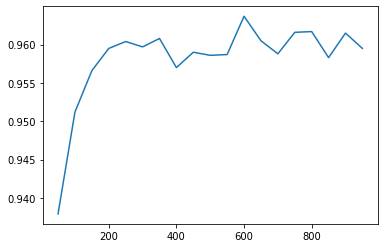

In [7]:
plt.plot(hidden_nodes, results)

In [12]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 800
output_nodes = 10
# коэффициент обучения
learning_rate = [0.1, 0.2, 0.3]
# количество эпох
epochs = 1

# списко для записи результатов
results = []

for i in learning_rate:
    print(f"сокрость ообучения: {i}")
    # экземпляр нейронной сети
    n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, i)
    # обучение нейросети
    fit(epochs=epochs, network=n, train=data_train, out_nodes=output_nodes)
    # прогнозирование
    scorecard = predict(network=n, test = data_test)
    # вывод результата
    res = result(scorecard)
    results.append(res)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:01<00:00, 5569.12it/s]


сокрость ообучения: 0.1
Обучение...
Клсссификация...
эффективность (ошибка): 0.961 (3.9%)


In [ ]:
plt.plot(learning_rate, results)

In [13]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 800
output_nodes = 10
# коэффициент обучения
learning_rate = 0.1
# количество эпох
epochs = [1, 3, 5, 7, 9]

# списко для записи результатов
results = []

for i in epochs:
    print(f"количество эпох: {i}")
    # экземпляр нейронной сети
    n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    # обучение нейросети
    fit(epochs=i, network=n, train=data_train, out_nodes=output_nodes)
    # прогнозирование
    scorecard = predict(network=n, test = data_test)
    # вывод результата
    res = result(scorecard)
    results.append(res)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:01<00:00, 5280.15it/s]


количество эпох: 1
Обучение...
Клсссификация...
эффективность (ошибка): 0.9596 (4.04%)
количество эпох: 3
Обучение...
Клсссификация...
эффективность (ошибка): 0.9715 (2.85%)
количество эпох: 5
Обучение...
Клсссификация...
эффективность (ошибка): 0.9746 (2.54%)
количество эпох: 7
Обучение...
Клсссификация...
эффективность (ошибка): 0.9769 (2.31%)
количество эпох: 9
Обучение...
Клсссификация...
эффективность (ошибка): 0.9747 (2.53%)


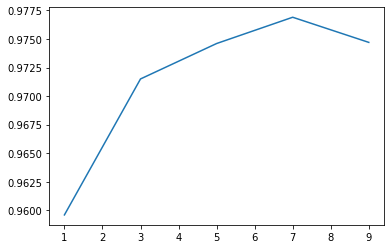

In [14]:
plt.plot(epochs, results)

## С учетом предобрабоки данных: выравнивание рукописных цифр

In [15]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 800
output_nodes = 10
# коэффициент обучения
learning_rate = 0.1
# экземпляр нейронной сети
n2 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
# обучение нейросети
fit(epochs=7, network=n2, train=data_train, out_nodes=output_nodes, deskew_dat=True)
# прогнозирование
scorecard2 = predict(network=n2, test=data_test, deskew_dat=True)
# вывод результата
result(scorecard2)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:05<00:00, 1810.42it/s]


Обучение...
Клсссификация...
эффективность (ошибка): 0.9824 (1.76%)


0.9824

In [16]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 800
output_nodes = 10
# коэффициент обучения
learning_rate = 0.1
# экземпляр нейронной сети
n3 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
# обучение нейросети
fit(epochs=7, network=n3, train=data_train, out_nodes=output_nodes, deskew_dat=True, elastic=(36, 6))
# прогнозирование
scorecard3 = predict(network=n3, test=data_test, deskew_dat=True, elastic=(36, 6))
# вывод результата
result(scorecard3)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:11<00:00, 860.63it/s]


Обучение...
Клсссификация...
эффективность (ошибка): 0.9624 (3.76%)


0.9624

In [17]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 800
output_nodes = 10
# коэффициент обучения
learning_rate = 0.1
# экземпляр нейронной сети
n4 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
# обучение нейросети
fit(epochs=7, network=n4, train=data_train, out_nodes=output_nodes, deskew_dat=True, elastic=(8, 4))
# прогнозирование
scorecard4 = predict(network=n4, test=data_test, deskew_dat=True, elastic=(8, 4))
# вывод результата
result(scorecard4)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:12<00:00, 796.39it/s]


Обучение...
Клсссификация...
эффективность (ошибка): 0.9656 (3.44%)


0.9656

## Задание параметров  трехслойной (один скрытый слой) нейронной сети

In [7]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes1 = 500
hidden_nodes2 = 300
output_nodes = 10
# коэффициент обучения
learning_rate = 0.05
# экземпляр нейронной сети
n5 = NeuralNetworkExt(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)
# обучение нейросети
fit(epochs=2, network=n5, train=data_train, out_nodes=output_nodes, deskew_dat=True)
# прогнозирование
scorecard5 = predict(network=n5, test=data_test, deskew_dat=True)
# вывод результата
result(scorecard5)

Обработка тестовых данных: 100%|██████████| 10000/10000 [00:05<00:00, 1940.01it/s]


Обучение...
Клсссификация...
эффективность (ошибка): 0.9736 (2.64%)


0.9736